# 1. Import and Install Dependencies

RUN 1

In [3]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

RUN 2

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

RUN 3 FROM HERE 

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

RUN TILL ABOVE

In [19]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [26]:
draw_styled_landmarks(frame, results)

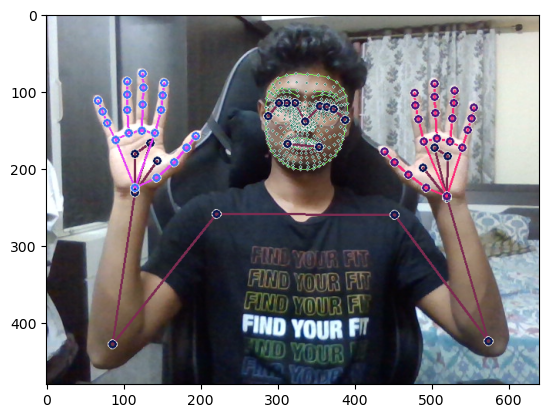

In [27]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [19]:
len(results.left_hand_landmarks.landmark)

21

In [79]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [23]:
result_test = extract_keypoints(results)

In [24]:
result_test

array([ 4.70539987e-01,  2.44718075e-01, -7.42542505e-01,  9.99997437e-01,
        4.97387260e-01,  2.00791657e-01, -6.91449285e-01,  9.99972761e-01,
        5.10462165e-01,  2.03213111e-01, -6.90947413e-01,  9.99986053e-01,
        5.23730457e-01,  2.06292018e-01, -6.90048039e-01,  9.99968767e-01,
        4.51798975e-01,  1.96991906e-01, -6.79740489e-01,  9.99974489e-01,
        4.36802089e-01,  1.95868939e-01, -6.80148005e-01,  9.99988616e-01,
        4.22838390e-01,  1.95905551e-01, -6.80180132e-01,  9.99976873e-01,
        5.41182399e-01,  2.32862607e-01, -3.73832166e-01,  9.99985635e-01,
        4.03028816e-01,  2.26932511e-01, -3.23049098e-01,  9.99993980e-01,
        4.97394621e-01,  2.98014462e-01, -6.29819989e-01,  9.99990106e-01,
        4.39119339e-01,  2.91649461e-01, -6.16732836e-01,  9.99991417e-01,
        6.39846206e-01,  4.93108362e-01, -2.08512142e-01,  9.99992609e-01,
        2.95946956e-01,  4.91933465e-01, -1.28221825e-01,  9.99991953e-01,
        7.94403672e-01,  

In [25]:
np.save('1', result_test)

RUN 4 FROM

In [7]:
np.load('1.npy')

array([ 4.70539987e-01,  2.44718075e-01, -7.42542505e-01,  9.99997437e-01,
        4.97387260e-01,  2.00791657e-01, -6.91449285e-01,  9.99972761e-01,
        5.10462165e-01,  2.03213111e-01, -6.90947413e-01,  9.99986053e-01,
        5.23730457e-01,  2.06292018e-01, -6.90048039e-01,  9.99968767e-01,
        4.51798975e-01,  1.96991906e-01, -6.79740489e-01,  9.99974489e-01,
        4.36802089e-01,  1.95868939e-01, -6.80148005e-01,  9.99988616e-01,
        4.22838390e-01,  1.95905551e-01, -6.80180132e-01,  9.99976873e-01,
        5.41182399e-01,  2.32862607e-01, -3.73832166e-01,  9.99985635e-01,
        4.03028816e-01,  2.26932511e-01, -3.23049098e-01,  9.99993980e-01,
        4.97394621e-01,  2.98014462e-01, -6.29819989e-01,  9.99990106e-01,
        4.39119339e-01,  2.91649461e-01, -6.16732836e-01,  9.99991417e-01,
        6.39846206e-01,  4.93108362e-01, -2.08512142e-01,  9.99992609e-01,
        2.95946956e-01,  4.91933465e-01, -1.28221825e-01,  9.99991953e-01,
        7.94403672e-01,  

# 4. Setup Folders for Collection

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data_2') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'repeat','please','goodbye','_'])

# 20 videos worth of data
no_sequences = 20

# Videos are going to be 20 frames in length
sequence_length = 20



In [65]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [66]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(1500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [67]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'hello': 0, 'thanks': 1, 'repeat': 2, 'please': 3, 'goodbye': 4, '_': 5}

In [12]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences).shape

(120, 20, 126)

In [14]:
np.array(labels).shape

(120,)

In [15]:
X = np.array(sequences)

In [16]:
X.shape

(120, 20, 126)

In [53]:
y = to_categorical(labels).astype(int)

Test size 30%

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [55]:
X_test.shape

(36, 20, 126)

# 7. Build and Train LSTM Neural Network

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dropout

In [35]:
log_dir = os.path.join('Logsv2.5')
tb_callback = TensorBoard(log_dir=log_dir)

In [11]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='tanh', input_shape=(20,126)))
model.add(LSTM(128, return_sequences=True, activation='tanh'))
model.add(LSTM(64, return_sequences=False, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [56]:
#alternative
#performance: good

model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='tanh', input_shape=(20, 126)))  
model.add(Dropout(0.5))  
model.add(LSTM(64, return_sequences=True, activation='tanh'))  
model.add(Dropout(0.5))  
model.add(LSTM(32, return_sequences=False, activation='tanh'))  
model.add(Dropout(0.5))  
model.add(Dense(32, activation='tanh')) 
model.add(Dense(actions.shape[0], activation='softmax'))


In [81]:
#alternative ka alternative
#performance: bad
model = Sequential()
model.add(LSTM(32, return_sequences=True, activation='tanh', input_shape=(20, 126)))  # Reduced LSTM units to 32
model.add(LSTM(64, return_sequences=True, activation='tanh'))  # Reduced LSTM units to 64
model.add(LSTM(32, return_sequences=False, activation='tanh'))  # Reduced LSTM units to 32
model.add(Dense(32, activation='tanh'))  # Reduced dense layer units to 32
model.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [100]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
3/3 [==============================] - 10s 42ms/step - loss: 7.2372 - categorical_accuracy: 0.3571
Epoch 2/300
3/3 [==============================] - 0s 39ms/step - loss: 6.6326 - categorical_accuracy: 0.6786
Epoch 3/300
3/3 [==============================] - 0s 38ms/step - loss: 6.1083 - categorical_accuracy: 0.4881
Epoch 4/300
3/3 [==============================] - 0s 40ms/step - loss: 5.6754 - categorical_accuracy: 0.5476
Epoch 5/300
3/3 [==============================] - 0s 38ms/step - loss: 5.3165 - categorical_accuracy: 0.6190
Epoch 6/300
3/3 [==============================] - 0s 39ms/step - loss: 4.9970 - categorical_accuracy: 0.5595
Epoch 7/300
3/3 [==============================] - 0s 38ms/step - loss: 4.6924 - categorical_accuracy: 0.8690
Epoch 8/300
3/3 [==============================] - 0s 38ms/step - loss: 4.3782 - categorical_accuracy: 0.8690
Epoch 9/300
3/3 [==============================] - 0s 62ms/step - loss: 4.0750 - categorical_accuracy: 0.8929
Epoch 10/

3/3 [==============================] - 0s 40ms/step - loss: 0.2579 - categorical_accuracy: 1.0000
Epoch 148/300
3/3 [==============================] - 0s 40ms/step - loss: 0.2557 - categorical_accuracy: 1.0000
Epoch 149/300
3/3 [==============================] - 0s 40ms/step - loss: 0.2535 - categorical_accuracy: 1.0000
Epoch 150/300
3/3 [==============================] - 0s 38ms/step - loss: 0.2514 - categorical_accuracy: 1.0000
Epoch 151/300
3/3 [==============================] - 0s 38ms/step - loss: 0.2492 - categorical_accuracy: 1.0000
Epoch 152/300
3/3 [==============================] - 0s 36ms/step - loss: 0.2472 - categorical_accuracy: 1.0000
Epoch 153/300
3/3 [==============================] - 0s 41ms/step - loss: 0.2451 - categorical_accuracy: 1.0000
Epoch 154/300
3/3 [==============================] - 0s 38ms/step - loss: 0.2431 - categorical_accuracy: 1.0000
Epoch 155/300
3/3 [==============================] - 0s 41ms/step - loss: 0.2411 - categorical_accuracy: 1.0000
Epoch 

3/3 [==============================] - 0s 36ms/step - loss: 0.4500 - categorical_accuracy: 0.8214
Epoch 294/300
3/3 [==============================] - 0s 35ms/step - loss: 0.4122 - categorical_accuracy: 0.8571
Epoch 295/300
3/3 [==============================] - 0s 36ms/step - loss: 0.3988 - categorical_accuracy: 0.8452
Epoch 296/300
3/3 [==============================] - 0s 36ms/step - loss: 0.4183 - categorical_accuracy: 0.8452
Epoch 297/300
3/3 [==============================] - 0s 38ms/step - loss: 0.4173 - categorical_accuracy: 0.8452
Epoch 298/300
3/3 [==============================] - 0s 35ms/step - loss: 0.4138 - categorical_accuracy: 0.8452
Epoch 299/300
3/3 [==============================] - 0s 39ms/step - loss: 0.4151 - categorical_accuracy: 0.8452
Epoch 300/300
3/3 [==============================] - 0s 41ms/step - loss: 0.4161 - categorical_accuracy: 0.8452


In [38]:
from tensorflow.keras.models import save_model
save_model(model,'modelv1.h5')

C:\Users\sjkar\AppData\Local\Temp\ipykernel_11380\18120853.py:2: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model,'modelv1.h5')


In [101]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 20, 64)            48896     
                                                                 
 lstm_13 (LSTM)              (None, 20, 128)           98816     
                                                                 
 lstm_14 (LSTM)              (None, 64)                49408     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 6)                 198       
                                                                 
Total params: 203558 (795.15 KB)
Trainable params: 203

# 8. Make Predictions

In [37]:
res = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [74]:
res

array([1.7990872e-04, 3.9455831e-06, 3.5984689e-05, 1.7809699e-04,
       1.5487122e-04, 9.9944717e-01], dtype=float32)

In [38]:
res.shape

(36, 6)

In [39]:
np.argmax(res[2])

2

In [77]:
actions[np.argmax(res[2])]

'hello'

In [41]:
np.argmax(res[4])

1

In [78]:
actions[np.argmax(y_test[2])]

'hello'

# 9. Save Weights

In [104]:
model.save('action2_5.h5')

C:\Users\sjkar\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [217]:
del model

In [63]:
model.load_weights('models/actionbest.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [64]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [65]:
yhat = model.predict(X_test)

2/2 [==============================] - 0s 8ms/step


In [66]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [67]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[30,  0],
        [ 0,  6]],

       [[27,  0],
        [ 0,  9]],

       [[32,  0],
        [ 0,  4]],

       [[32,  0],
        [ 0,  4]],

       [[31,  0],
        [ 0,  5]],

       [[28,  0],
        [ 0,  8]]], dtype=int64)

In [68]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [69]:
from scipy import stats

In [70]:
colors = [(245,117,16), (117,245,16), (16,117,245), (56,17,285), (6,11,25),
         (25,11,60)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [73]:
sequence = []
sentence = []
predictions = []
threshold = 0.85
# Initialize video capture
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-20:]

        if len(sequence) == 20:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:
                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != "_" and actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        if actions[np.argmax(res)] != "_":
                            sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)

        # Draw interface elements
        cv2.rectangle(image, (0, 0), (800, 50), (211, 211, 211), -1)  # Soft gray color
        #cv2.putText(image, 'Detected Actions:', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (255, 255, 255), 2, cv2.LINE_AA)
        actions_text = ' '.join(sentence)
        cv2.putText(image, actions_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

        # Resize image
        image = cv2.resize(image, (860, 640))

        # Show to screen
        cv2.imshow('Gesture Detection Interface', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    # Release video capture and close windows
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 21ms/step


In [25]:
cap.release()
cv2.destroyAllWindows()

In [47]:
tensorflowjs_converter \ --input_format=keras \ action2.2.h5 \ /tfjs_model

SyntaxError: unexpected character after line continuation character (3298799711.py, line 1)